In [1]:
import os
import matplotlib as mpl
import matplotlib.pylab as plt
import itertools
import csv , codecs
import glob
from PIL import Image
import numpy as np
import pandas as pd
import openpyxl
from openpyxl import Workbook
from openpyxl import load_workbook
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA



In [2]:
data_dir = "./EEG_data/"

## CSV 파일 생성 함수


### task 0 1 2 : 1-back,  2-back,  rest

### eye 0  1    : close eye,     open eye

### respiratory 0 1 2 : mouse, nose, O2 



In [3]:
def dataset_csv_3():
    normalize_power = str(input("Relative, Abs :"))
    excel_dir = "./EEG_data" + '/' + normalize_power
    excel_list = sorted(glob.glob(excel_dir+'/[!~]*.xlsx'))
    
    subject = int(input("subject :"))
    book = Workbook()
    sheet = book.active
    sheet.cell(row=1, column=161).value = 'target'
 
    # x축 생성   
    for i in range(1,33):
        sheet.cell(row=1, column=i).value = 'ACh' + str(i)
        sheet.cell(row=1, column=i+32).value = 'BCh' + str(i)
        sheet.cell(row=1, column=i+64).value = 'DCh' + str(i)
        sheet.cell(row=1, column=i+96).value = 'GCh' + str(i)
        sheet.cell(row=1, column=i+128).value = 'TCh' + str(i)
        
    # 파일을 순차적으로 열어서 셀 영역을 복사
    for j in range(0,5):
        wb = openpyxl.load_workbook(excel_list[j], data_only=True)
        wb_sheet = wb.sheetnames
        for k in range(0,12):
            source = wb[wb_sheet[k]]
            for l in range(2, 22):
                for m in range(2, 34):
                    sheet.cell(row=20*k+l,column=32*j+m-1).value = source.cell(row=l,column=m).value
        

    with open('./dataset_eeg_3.csv', 'w', newline="") as f:
        c = csv.writer(f)
        for r in sheet.rows:
            c.writerow([cell.value for cell in r])
            
    df = pd.read_csv('./dataset_eeg_3.csv')
    df[df =='                      NaN'] =np.nan
    df = df.fillna(0.0).astype('float64')
    pd.options.mode.chained_assignment = None
#1-back mouse, nose, o2
    df["target"][0*subject:1*subject] = "0" #0:20
    df["target"][1*subject:2*subject] = "1" #21:40
    df["target"][2*subject:3*subject] = "2" #41:60
#2-back mouse, nose, o2
    df["target"][3*subject:4*subject] = "0" #60:80
    df["target"][4*subject:5*subject] = "1" #80:100
    df["target"][5*subject:6*subject] = "2" #100:120
#rest close eye mouse, nose, o2
    df["target"][6*subject:7*subject] = "0" #120:140
    df["target"][7*subject:8*subject] = "1" #140:160
    df["target"][8*subject:9*subject] = "2" #160:180
#rest open eye mouse, nose, o2
    df["target"][9*subject:10*subject] = "0" #180:200
    df["target"][10*subject:11*subject] = "1" #200:220
    df["target"][11*subject:12*subject] = "2" #220:240
    df.astype('float64')
    df.to_csv('./dataset_eeg_3.csv')
    
    return df
            


In [4]:
eeg_data_3 = pd.read_csv('./dataset_eeg_3_O2zero.csv',index_col=0)

In [5]:
idx_ch_list = []
for i in range(0,161):
    idx_ch_list.append(i)
    
for j in range(32*3,32*4):
    idx_ch_list.remove(j)
print(idx_ch_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160]


In [6]:
state={}

state["1back_mouse"]=eeg_data_3.iloc[0:20]
state["1back_nose"]=eeg_data_3.iloc[20:40]
state["1back_O2"]=eeg_data_3.iloc[40:60]

state["2back_mouse"]=eeg_data_3.iloc[60:80]
state["2back_nose"]=eeg_data_3.iloc[80:100]
state["2back_O2"]=eeg_data_3.iloc[100:120]

state["close_rest_mouse"]=eeg_data_3.iloc[120:140]
state["close_rest_nose"]=eeg_data_3.iloc[140:160]
state["close_rest_O2"]=eeg_data_3.iloc[160:180]

state["open_rest_mouse"]=eeg_data_3.iloc[180:200]
state["open_rest_nose"]=eeg_data_3.iloc[200:220]
state["open_rest_O2"]=eeg_data_3.iloc[220:240]

In [7]:
ex_state={}

ex_state["1back_mouse"]=eeg_data_3.iloc[0:20,idx_ch_list]
ex_state["1back_nose"]=eeg_data_3.iloc[20:40,idx_ch_list]
ex_state["1back_O2"]=eeg_data_3.iloc[40:60,idx_ch_list]

ex_state["2back_mouse"]=eeg_data_3.iloc[60:80,idx_ch_list]
ex_state["2back_nose"]=eeg_data_3.iloc[80:100,idx_ch_list]
ex_state["2back_O2"]=eeg_data_3.iloc[100:120,idx_ch_list]

ex_state["close_rest_mouse"]=eeg_data_3.iloc[120:140,idx_ch_list]
ex_state["close_rest_nose"]=eeg_data_3.iloc[140:160,idx_ch_list]
ex_state["close_rest_O2"]=eeg_data_3.iloc[160:180,idx_ch_list]

ex_state["open_rest_mouse"]=eeg_data_3.iloc[180:200,idx_ch_list]
ex_state["open_rest_nose"]=eeg_data_3.iloc[200:220,idx_ch_list]
ex_state["open_rest_O2"]=eeg_data_3.iloc[220:240,idx_ch_list]

In [8]:
ds_train = {}
ds_test = {}


ds_train={"1back_mouse":state["1back_mouse"], 
       "1back_nose":state["1back_nose"],
       "1back_O2":state["1back_O2"],
       "1back_m_n":state["1back_mouse"].append(state["1back_nose"]),
       "1back":state["1back_mouse"].append(state["1back_nose"]).append(state["1back_O2"]),
       
                                               
       "2back_mouse":state["2back_mouse"],
       "2back_nose":state["2back_nose"],
       "2back_O2":state["2back_O2"],
       "2back_m_n":state["2back_mouse"].append(state["2back_nose"]),
       "2back":state["2back_mouse"].append(state["2back_nose"]).append(state["2back_O2"]),
       
       "close_rest_mouse":state["close_rest_mouse"], 
       "close_rest_nose":state["close_rest_nose"],
       "close_rest_O2":state["close_rest_O2"],
       "close_rest_m_n":state["close_rest_mouse"].append(state["close_rest_nose"]),
       "close_rest":state["close_rest_mouse"].append(state["close_rest_nose"]).append(state["close_rest_O2"]),
       
       "open_rest_mouse":state["open_rest_mouse"],
       "open_rest_nose":state["open_rest_nose"],
       "open_rest_O2":state["open_rest_O2"],
       "open_rest_m_n":state["open_rest_mouse"].append(state["open_rest_nose"]),
       "open_rest":state["open_rest_mouse"].append(state["open_rest_nose"]).append(state["open_rest_O2"]),
       
       
       "total_mouse" : state["1back_mouse"].append(state["2back_mouse"]).append(state["close_rest_mouse"]).append(state["open_rest_mouse"]),
       "total_nose" : state["1back_nose"].append(state["2back_nose"]).append(state["close_rest_nose"]).append(state["open_rest_nose"]),
       "total_O2" : state["1back_O2"].append(state["2back_O2"]).append(state["close_rest_O2"]).append(state["open_rest_O2"]),
       "total_m_n": state["1back_mouse"].append(state["1back_nose"]).append(state["2back_mouse"]).append(state["2back_nose"]).append(state["close_rest_mouse"]).append(state["close_rest_nose"]).append(state["open_rest_mouse"]).append(state["open_rest_nose"]),
       "total": state["1back_mouse"].append(state["1back_nose"]).append(state["1back_O2"]).append(state["2back_mouse"]).append(state["2back_nose"]).append(state["2back_O2"]).append(state["close_rest_mouse"]).append(state["close_rest_nose"]).append(state["close_rest_O2"]).append(state["open_rest_mouse"]).append(state["open_rest_nose"]).append(state["open_rest_O2"])
       
       
      }

ds_test = {"1back_mouse":state["1back_mouse"], 
       "1back_nose":state["1back_nose"],
       "1back_O2":state["1back_O2"],
       "1back_m_n":state["1back_mouse"].append(state["1back_nose"]),
       "1back":state["1back_mouse"].append(state["1back_nose"]).append(state["1back_O2"]),
       
                                               
       "2back_mouse":state["2back_mouse"],
       "2back_nose":state["2back_nose"],
       "2back_O2":state["2back_O2"],
       "2back_m_n":state["2back_mouse"].append(state["2back_nose"]),
       "2back":state["2back_mouse"].append(state["2back_nose"]).append(state["2back_O2"]),
       
       "close_rest_mouse":state["close_rest_mouse"], 
       "close_rest_nose":state["close_rest_nose"],
       "close_rest_O2":state["close_rest_O2"],
       "close_rest_m_n":state["close_rest_mouse"].append(state["close_rest_nose"]),
       "close_rest":state["close_rest_mouse"].append(state["close_rest_nose"]).append(state["close_rest_O2"]),
       
       "open_rest_mouse":state["open_rest_mouse"],
       "open_rest_nose":state["open_rest_nose"],
       "open_rest_O2":state["open_rest_O2"],
       "open_rest_m_n":state["open_rest_mouse"].append(state["open_rest_nose"]),
       "open_rest":state["open_rest_mouse"].append(state["open_rest_nose"]).append(state["open_rest_O2"]),
        
        
               
       "total_mouse" : state["1back_mouse"].append(state["2back_mouse"]).append(state["close_rest_mouse"]).append(state["open_rest_mouse"]),
        "total_nose" : state["1back_nose"].append(state["2back_nose"]).append(state["close_rest_nose"]).append(state["open_rest_nose"]),
       "total_O2" : state["1back_O2"].append(state["2back_O2"]).append(state["close_rest_O2"]).append(state["open_rest_O2"]),
       "total_m_n": state["1back_mouse"].append(state["1back_nose"]).append(state["2back_mouse"]).append(state["2back_nose"]).append(state["close_rest_mouse"]).append(state["close_rest_nose"]).append(state["open_rest_mouse"]).append(state["open_rest_nose"]),
        "total": state["1back_mouse"].append(state["1back_nose"]).append(state["1back_O2"]).append(state["2back_mouse"]).append(state["2back_nose"]).append(state["2back_O2"]).append(state["close_rest_mouse"]).append(state["close_rest_nose"]).append(state["close_rest_O2"]).append(state["open_rest_mouse"]).append(state["open_rest_nose"]).append(state["open_rest_O2"])

       }




In [9]:
ex_ds_train = {}
ex_ds_test = {}


ex_ds_train={"1back_mouse":ex_state["1back_mouse"], 
       "1back_nose":ex_state["1back_nose"],
       "1back_O2":ex_state["1back_O2"],
       "1back_m_n":ex_state["1back_mouse"].append(ex_state["1back_nose"]),
       "1back":ex_state["1back_mouse"].append(ex_state["1back_nose"]).append(ex_state["1back_O2"]),
       
                                               
       "2back_mouse":ex_state["2back_mouse"],
       "2back_nose":ex_state["2back_nose"],
       "2back_O2":ex_state["2back_O2"],
       "2back_m_n":ex_state["2back_mouse"].append(ex_state["2back_nose"]),
       "2back":ex_state["2back_mouse"].append(ex_state["2back_nose"]).append(ex_state["2back_O2"]),
       
       "close_rest_mouse":ex_state["close_rest_mouse"], 
       "close_rest_nose":ex_state["close_rest_nose"],
       "close_rest_O2":ex_state["close_rest_O2"],
       "close_rest_m_n":ex_state["close_rest_mouse"].append(ex_state["close_rest_nose"]),
       "close_rest":ex_state["close_rest_mouse"].append(ex_state["close_rest_nose"]).append(ex_state["close_rest_O2"]),
       
       "open_rest_mouse":ex_state["open_rest_mouse"],
       "open_rest_nose":ex_state["open_rest_nose"],
       "open_rest_O2":ex_state["open_rest_O2"],
       "open_rest_m_n":ex_state["open_rest_mouse"].append(ex_state["open_rest_nose"]),
       "open_rest":ex_state["open_rest_mouse"].append(ex_state["open_rest_nose"]).append(ex_state["open_rest_O2"]),
       
       
       "total_mouse" : ex_state["1back_mouse"].append(ex_state["2back_mouse"]).append(ex_state["close_rest_mouse"]).append(ex_state["open_rest_mouse"]),
       "total_nose" : ex_state["1back_nose"].append(ex_state["2back_nose"]).append(ex_state["close_rest_nose"]).append(ex_state["open_rest_nose"]),
       "total_O2" : ex_state["1back_O2"].append(ex_state["2back_O2"]).append(ex_state["close_rest_O2"]).append(ex_state["open_rest_O2"]),
       "total_m_n": ex_state["1back_mouse"].append(ex_state["1back_nose"]).append(ex_state["2back_mouse"]).append(ex_state["2back_nose"]).append(ex_state["close_rest_mouse"]).append(ex_state["close_rest_nose"]).append(ex_state["open_rest_mouse"]).append(ex_state["open_rest_nose"]),
       "total": ex_state["1back_mouse"].append(ex_state["1back_nose"]).append(ex_state["1back_O2"]).append(ex_state["2back_mouse"]).append(ex_state["2back_nose"]).append(ex_state["2back_O2"]).append(ex_state["close_rest_mouse"]).append(ex_state["close_rest_nose"]).append(ex_state["close_rest_O2"]).append(ex_state["open_rest_mouse"]).append(ex_state["open_rest_nose"]).append(ex_state["open_rest_O2"])
       
       
      }

ex_ds_test={"1back_mouse":ex_state["1back_mouse"], 
       "1back_nose":ex_state["1back_nose"],
       "1back_O2":ex_state["1back_O2"],
       "1back_m_n":ex_state["1back_mouse"].append(ex_state["1back_nose"]),
       "1back":ex_state["1back_mouse"].append(ex_state["1back_nose"]).append(ex_state["1back_O2"]),
       
                                               
       "2back_mouse":ex_state["2back_mouse"],
       "2back_nose":ex_state["2back_nose"],
       "2back_O2":ex_state["2back_O2"],
       "2back_m_n":ex_state["2back_mouse"].append(ex_state["2back_nose"]),
       "2back":ex_state["2back_mouse"].append(ex_state["2back_nose"]).append(ex_state["2back_O2"]),
       
       "close_rest_mouse":ex_state["close_rest_mouse"], 
       "close_rest_nose":ex_state["close_rest_nose"],
       "close_rest_O2":ex_state["close_rest_O2"],
       "close_rest_m_n":ex_state["close_rest_mouse"].append(ex_state["close_rest_nose"]),
       "close_rest":ex_state["close_rest_mouse"].append(ex_state["close_rest_nose"]).append(ex_state["close_rest_O2"]),
       
       "open_rest_mouse":ex_state["open_rest_mouse"],
       "open_rest_nose":ex_state["open_rest_nose"],
       "open_rest_O2":ex_state["open_rest_O2"],
       "open_rest_m_n":ex_state["open_rest_mouse"].append(ex_state["open_rest_nose"]),
       "open_rest":ex_state["open_rest_mouse"].append(ex_state["open_rest_nose"]).append(ex_state["open_rest_O2"]),
       
       
       "total_mouse" : ex_state["1back_mouse"].append(ex_state["2back_mouse"]).append(ex_state["close_rest_mouse"]).append(ex_state["open_rest_mouse"]),
       "total_nose" : ex_state["1back_nose"].append(ex_state["2back_nose"]).append(ex_state["close_rest_nose"]).append(ex_state["open_rest_nose"]),
       "total_O2" : ex_state["1back_O2"].append(ex_state["2back_O2"]).append(ex_state["close_rest_O2"]).append(ex_state["open_rest_O2"]),
       "total_m_n": ex_state["1back_mouse"].append(ex_state["1back_nose"]).append(ex_state["2back_mouse"]).append(ex_state["2back_nose"]).append(ex_state["close_rest_mouse"]).append(ex_state["close_rest_nose"]).append(ex_state["open_rest_mouse"]).append(ex_state["open_rest_nose"]),
       "total": ex_state["1back_mouse"].append(ex_state["1back_nose"]).append(ex_state["1back_O2"]).append(ex_state["2back_mouse"]).append(ex_state["2back_nose"]).append(ex_state["2back_O2"]).append(ex_state["close_rest_mouse"]).append(ex_state["close_rest_nose"]).append(ex_state["close_rest_O2"]).append(ex_state["open_rest_mouse"]).append(ex_state["open_rest_nose"]).append(ex_state["open_rest_O2"])
       
       
      }




In [41]:
def LDA_RF_M_N_O2 (tasks, k_parameter, num_iter):
    std = [] 
#     for mode in ['no_lda','lda']:
    for mode in ['lda']:
        for task_train,task_test in tasks:

            print('-------------------')
            print('training:{}/test:{}/mode:{}'.format(task_train,task_test,mode))
            train_3 = ds_train[task_train]
            test_3  = ds_test[task_test]

            X = np.array(train_3.iloc[:,0:-1])
            Y = np.array(train_3['target'])

            rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

            all_scores = []
            Mouse = 0
            Nose = 0
            for idx in range(num_iter):
                skf = StratifiedKFold(n_splits=k_parameter, shuffle=True)
                skf.get_n_splits(X,Y)

                for train_index, test_index in skf.split(X,Y):

                    X_final = X
                    lda = LinearDiscriminantAnalysis(n_components=1)
                    if(mode == 'lda') : 
                        lda.fit(X,Y)
#                         X_final = X
                        X_final = lda.transform(X)
                    

                    rnd_clf.fit(X_final[train_index], Y[train_index])
                    val_mae = rnd_clf.score(X_final[test_index],Y[test_index])
                    all_scores.append(val_mae)

                    test = np.array(test_3.iloc[:,0:-1])
                    test = lda.transform(test)

                    aaa = rnd_clf.predict(test)

                    Mouse = Mouse+np.count_nonzero(aaa==0)
                    Nose = Nose+ np.count_nonzero(aaa==1)
                    std.append(Mouse/(Mouse+Nose))

            print('model_score:{}'.format(np.mean(all_scores)))
            print('std:{}'.format(np.std(all_scores)))
            print('mouse:{}({:.4}), nose:{}({:.4}) / total:{}'.format(Mouse,Mouse/(Mouse+Nose),Nose,Nose/(Mouse+Nose),(Mouse+Nose)))
            
    return std

In [42]:
def ex_LDA_RF_M_N_O2 (tasks, k_parameter, num_iter):
    std = [] 
#     for mode in ['no_lda','lda']:
    for mode in ['lda']:
        for task_train,task_test in tasks:

            print('-------------------')
            print('training:{}/test:{}/mode:{}'.format(task_train,task_test,mode))
            train_3 = ex_ds_train[task_train]
            test_3  = ex_ds_test[task_test]

            X = np.array(train_3.iloc[:,0:-1])
            Y = np.array(train_3['target'])

            rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

            all_scores = []
            Mouse = 0
            Nose = 0
            for idx in range(num_iter):
                skf = StratifiedKFold(n_splits=k_parameter, shuffle=True)
#                 print(skf.get_n_splits(X,Y))

                for train_index, test_index in skf.split(X,Y):

                    X_final = X
                    lda = LinearDiscriminantAnalysis(n_components=1)
                    if(mode == 'lda') : 
                        lda.fit(X,Y)
#                         X_final = X
                        X_final = lda.transform(X)
                    

                    rnd_clf.fit(X_final[train_index], Y[train_index])
                    val_mae = rnd_clf.score(X_final[test_index],Y[test_index])
                    all_scores.append(val_mae)

                    test = np.array(test_3.iloc[:,0:-1])
                    if mode == 'lda':
#                         pass
                        test = lda.transform(test)

                    aaa = rnd_clf.predict(test)

                    Mouse = Mouse+np.count_nonzero(aaa==0)
                    Nose = Nose+ np.count_nonzero(aaa==1)
                    std.append(Mouse/(Mouse+Nose))


            print('model_score:{}'.format(np.mean(all_scores)))
            print('std:{}'.format(np.std(all_scores)))
            print('mouse:{}({:.4}), nose:{}({:.4}) / total:{}'.format(Mouse,Mouse/(Mouse+Nose),Nose,Nose/(Mouse+Nose),(Mouse+Nose)))
            
    return std

# Task list

        * 1back_mouse, 1back_nose, 1back_O2, 1back_m_n, 1back
        
        
        * 2back_mouse, 2back_nose, 2back_O2, 2back_m_n, 2back
        
        
        * close_rest_mouse, close_rest_nose, close_rest_O2, close_rest_m_n, close_rest
        
        
        * open_rest_mouse, open_rest_nose, open_rest_O2, open_rest_m_n, open_rest
        
        * total_mouse, total_nose, total_O2, total_m_n
 


### Poster Result data

# 기존 결과

In [73]:
print(" Result data")
tasks1 = [
    ('close_rest_m_n','close_rest_O2'),
    ('close_rest_m_n','open_rest_O2'),
     ('close_rest_m_n','1back_O2'),
     ('close_rest_m_n','2back_O2'),

 ]
print("LDA-RF")
result = LDA_RF_M_N_O2(tasks1,k_parameter = 10,num_iter = 50)


 Result data
LDA-RF
-------------------
training:close_rest_m_n/test:close_rest_O2/mode:lda
model_score:0.948
std:0.10860939185908373
mouse:5059(0.5059), nose:4941(0.4941) / total:10000
-------------------
training:close_rest_m_n/test:open_rest_O2/mode:lda
model_score:0.95
std:0.10488088481701514
mouse:5000(0.5), nose:5000(0.5) / total:10000
-------------------
training:close_rest_m_n/test:1back_O2/mode:lda
model_score:0.9475
std:0.11121488209767612
mouse:3557(0.3557), nose:6443(0.6443) / total:10000
-------------------
training:close_rest_m_n/test:2back_O2/mode:lda
model_score:0.949
std:0.11022250223978768
mouse:2558(0.2558), nose:7442(0.7442) / total:10000


In [89]:
print('closed eye rest state std : {}'.format(np.round(np.std(result[0:10]),3 )))
print('opened eye rest state std : {}'.format(np.round(np.std(result[10:20] ),3)))
print('1-back std : {}'.format(np.round(np.std(result[20:30]),3 )))
print('2-back std : {}'.format(np.round(np.std(result[30:40] ),3)))

closed eye rest state std : 0.007
opened eye rest state std : 0.001
1-back std : 0.001
2-back std : 0.0


In [71]:
print('closed eye rest state std : {}'.format(np.round(np.std(result[0:10]),3 )))
print('opened eye rest state std : {}'.format(np.round(np.std(result[10:20] ),3)))
print('1-back std : {}'.format(np.round(np.std(result[20:30]),3 )))
print('2-back std : {}'.format(np.round(np.std(result[30:40] ),3)))

closed eye rest state std : 0.003
opened eye rest state std : 0.0
1-back std : 0.009
2-back std : 0.014


# Exclusive Gamma band Result


In [74]:
print(" Result data")
tasks1 = [
    ('close_rest_m_n','close_rest_O2'),
    ('close_rest_m_n','open_rest_O2'),
     ('close_rest_m_n','1back_O2'),
     ('close_rest_m_n','2back_O2'),

 ]
print("LDA-RF")
ex_result = ex_LDA_RF_M_N_O2(tasks1,k_parameter = 10,num_iter = 50)


 Result data
LDA-RF
-------------------
training:close_rest_m_n/test:close_rest_O2/mode:lda
model_score:0.927
std:0.12317061337835418
mouse:5549(0.5549), nose:4451(0.4451) / total:10000
-------------------
training:close_rest_m_n/test:open_rest_O2/mode:lda
model_score:0.926
std:0.12459534501738015
mouse:3562(0.3562), nose:6438(0.6438) / total:10000
-------------------
training:close_rest_m_n/test:1back_O2/mode:lda
model_score:0.923
std:0.12677144788949915
mouse:3550(0.355), nose:6450(0.645) / total:10000
-------------------
training:close_rest_m_n/test:2back_O2/mode:lda
model_score:0.9235
std:0.12256732843625173
mouse:2005(0.2005), nose:7995(0.7995) / total:10000


In [90]:
print('closed eye rest state std : {}'.format(np.round(np.std(ex_result[0:10]),3 )))
print('opened eye rest state std : {}'.format(np.round(np.std(ex_result[10:20] ),3)))
print('1-back std : {}'.format(np.round(np.std(ex_result[20:30]),3 )))
print('2-back std : {}'.format(np.round(np.std(ex_result[30:40] ),3)))

closed eye rest state std : 0.003
opened eye rest state std : 0.001
1-back std : 0.001
2-back std : 0.0


In [72]:
print('closed eye rest state std : {}'.format(np.round(np.std(ex_result[0:10]),3 )))
print('opened eye rest state std : {}'.format(np.round(np.std(ex_result[10:20] ),3)))
print('1-back std : {}'.format(np.round(np.std(ex_result[20:30]),3 )))
print('2-back std : {}'.format(np.round(np.std(ex_result[30:40] ),3)))

closed eye rest state std : 0.003
opened eye rest state std : 0.007
1-back std : 0.007
2-back std : 0.006


In [75]:
def test(tasks, k_parameter, num_iter):
    for task_train,task_test in tasks:
        print('-------------------')
        print('training:{}/test:{}'.format(task_train,task_test))
        train_3 = ds_train[task_train]
        test_3  = ds_test[task_test]
        m_n = ds_train['total_m_n']
        m_n_X = np.array(m_n.iloc[:,0:-2])
        m_n_Y = np.array(m_n['target'])
        lda = LinearDiscriminantAnalysis(n_components=1)
        lda.fit(m_n_X,m_n_Y)

        X = np.array(train_3.iloc[:,0:-2])
        Y = np.array(train_3['target'])

        rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

        all_scores = []
        Mouse = 0
        Nose = 0
        for idx in range(num_iter):
            skf = StratifiedKFold(n_splits=k_parameter, shuffle=True)
            skf.get_n_splits(X,Y)

            for train_index, test_index in skf.split(X,Y):
                X_final = lda.transform(X)
                rnd_clf.fit(X_final[train_index], Y[train_index])
                val_mae = rnd_clf.score(X_final[test_index],Y[test_index])
                all_scores.append(val_mae)

                test = np.array(test_3.iloc[:,0:-2])
                test = lda.transform(test)

                aaa = rnd_clf.predict(test)

                Mouse = Mouse+np.count_nonzero(aaa==0)
                Nose = Nose+ np.count_nonzero(aaa==1)

        print('model_score:{}'.format(np.mean(all_scores)))
        print('mouse:{}({:.2}), nose:{}({:.2}) / total:{}'.format(Mouse,Mouse/(Mouse+Nose),Nose,Nose/(Mouse+Nose),(Mouse+Nose)))

In [76]:
tasks1 = [
    ('close_rest_m_n','close_rest_O2'),
    ('close_rest_m_n','open_rest_O2'),
     ('close_rest_m_n','1back_O2'),
     ('close_rest_m_n','2back_O2'),

 ]
print("test")
test(tasks1,k_parameter = 10,num_iter = 1)


test
-------------------
training:close_rest_m_n/test:close_rest_O2
model_score:0.9
mouse:50(0.25), nose:150(0.75) / total:200
-------------------
training:close_rest_m_n/test:open_rest_O2
model_score:0.9
mouse:90(0.45), nose:110(0.55) / total:200
-------------------
training:close_rest_m_n/test:1back_O2
model_score:0.925
mouse:111(0.56), nose:89(0.45) / total:200
-------------------
training:close_rest_m_n/test:2back_O2
model_score:0.9
mouse:102(0.51), nose:98(0.49) / total:200


# LDA_Co_efficient 뽑아낸것

In [77]:
m_n = ds_train['close_rest_m_n']
m_n_X = np.array(m_n.iloc[:,0:-1])
m_n_Y = np.array(m_n['target'])
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(m_n_X,m_n_Y)

a = []

for channel, coef in zip(eeg_data_3.columns[:-1], lda.coef_[0]):
    a.append([channel, coef])
    


In [78]:
alpha = pd.DataFrame(a[0:32],columns=['channel','LDARF_Coefficient'])
beta = pd.DataFrame(a[32:64],columns=['channel','LDARF_Coefficient'])
delta = pd.DataFrame(a[64:96],columns=['channel','LDARF_Coefficient'])
gamma = pd.DataFrame(a[96:128],columns=['channel','LDARF_Coefficient'])
theta = pd.DataFrame(a[128:160],columns=['channel','LDARF_Coefficient'])

alpha.to_csv('alpha.csv')
beta.to_csv('beta.csv')
delta.to_csv('delta.csv')
gamma.to_csv('gamma.csv')
theta.to_csv('theta.csv')


# LDA_Co_efficient 뽑아낸것( exclusive gamma)

In [79]:
m_n = ex_ds_train['close_rest_m_n']
m_n_X = np.array(m_n.iloc[:,0:-1])
m_n_Y = np.array(m_n['target'])
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(m_n_X,m_n_Y)

b= []

for channel, coef in zip(m_n.columns[:-1], lda.coef_[0]):
    b.append([channel, coef])
    

In [80]:
ex_alpha = pd.DataFrame(b[0:32],columns=['channel','LDARF_Coefficient'])
ex_beta = pd.DataFrame(b[32:64],columns=['channel','LDARF_Coefficient'])
ex_delta = pd.DataFrame(b[64:96],columns=['channel','LDARF_Coefficient'])
ex_theta = pd.DataFrame(b[96:128],columns=['channel','LDARF_Coefficient'])

ex_alpha.to_csv('ex_alpha.csv')
ex_beta.to_csv('ex_beta.csv')
ex_delta.to_csv('ex_delta.csv')
ex_theta.to_csv('ex_theta.csv')


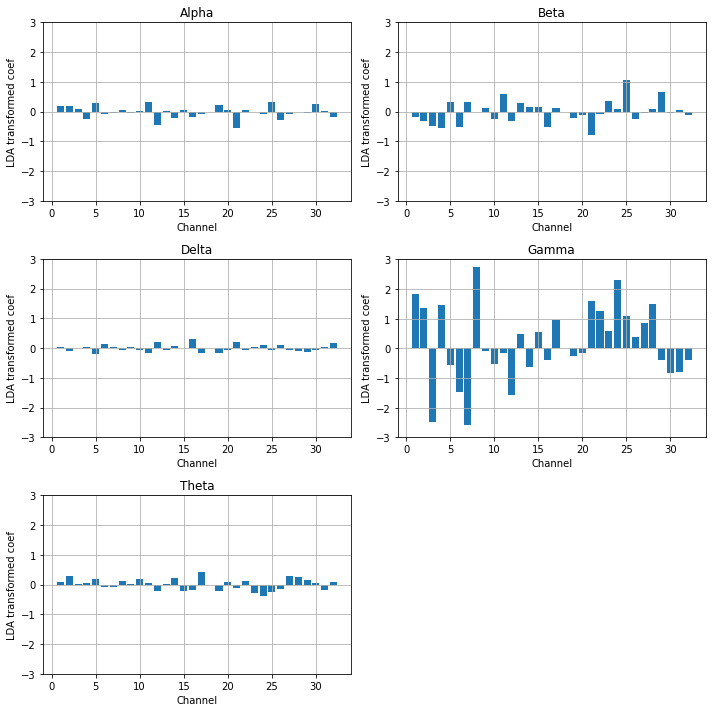

In [81]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3= fig.add_subplot(3,2,3)
ax4= fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)

ax1.bar(np.arange(1,33,1),alpha["LDARF_Coefficient"])
ax1.set_yticks([-3,-2,-1,0,1,2,3])
ax1.set_ylabel("LDA transformed coef")
ax1.set_xlabel("Channel")
ax1.set_title("Alpha")
ax1.grid()

ax2.bar(np.arange(1,33,1),beta["LDARF_Coefficient"])
ax2.set_yticks([-3,-2,-1,0,1,2,3])
ax2.set_ylabel("LDA transformed coef")
ax2.set_xlabel("Channel")
ax2.set_title("Beta")
ax2.grid()


ax3.bar(np.arange(1,33,1),delta["LDARF_Coefficient"])
ax3.set_yticks([-3,-2,-1,0,1,2,3])
ax3.set_ylabel("LDA transformed coef")
ax3.set_xlabel("Channel")
ax3.set_title("Delta")
ax3.grid()


ax4.bar(np.arange(1,33,1),gamma["LDARF_Coefficient"])
ax4.set_yticks([-3,-2,-1,0,1,2,3])
ax4.set_ylabel("LDA transformed coef")
ax4.set_xlabel("Channel")
ax4.set_title("Gamma")
ax4.grid()


ax5.bar(np.arange(1,33,1),theta["LDARF_Coefficient"])
ax5.set_yticks([-3,-2,-1,0,1,2,3])
ax5.set_ylabel("LDA transformed coef")
ax5.set_xlabel("Channel")
ax5.set_title("Theta")
ax5.grid()
fig.tight_layout()


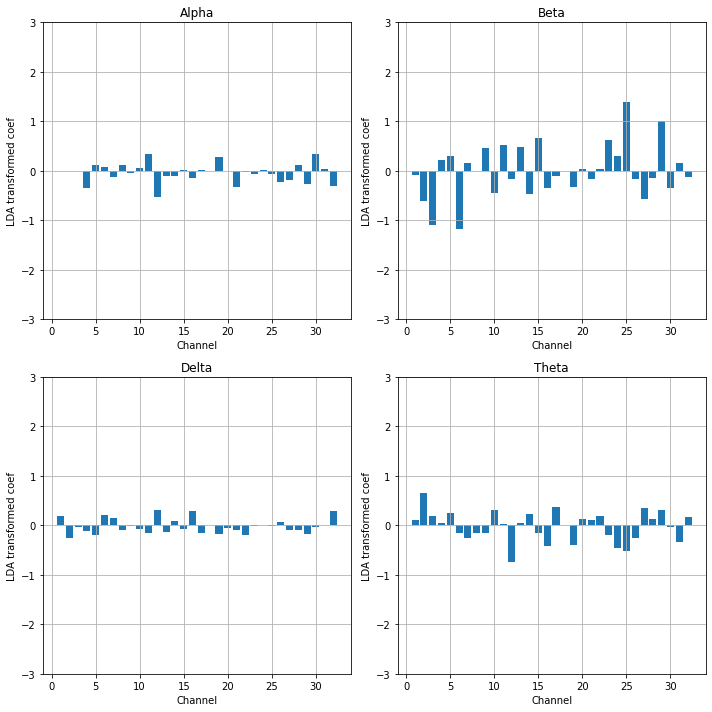

In [82]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

ax1.bar(np.arange(1,33,1),ex_alpha["LDARF_Coefficient"])
ax1.set_yticks([-3,-2,-1,0,1,2,3])
ax1.set_ylabel("LDA transformed coef")
ax1.set_xlabel("Channel")
ax1.set_title("Alpha")
ax1.grid()

ax2.bar(np.arange(1,33,1),ex_beta["LDARF_Coefficient"])
ax2.set_yticks([-3,-2,-1,0,1,2,3])
ax2.set_ylabel("LDA transformed coef")
ax2.set_xlabel("Channel")
ax2.set_title("Beta")
ax2.grid()


ax3.bar(np.arange(1,33,1),ex_delta["LDARF_Coefficient"])
ax3.set_yticks([-3,-2,-1,0,1,2,3])
ax3.set_ylabel("LDA transformed coef")
ax3.set_xlabel("Channel")
ax3.set_title("Delta")
ax3.grid()



ax4.bar(np.arange(1,33,1),ex_theta["LDARF_Coefficient"])
ax4.set_yticks([-3,-2,-1,0,1,2,3])
ax4.set_ylabel("LDA transformed coef")
ax4.set_xlabel("Channel")
ax4.set_title("Theta")
ax4.grid()
fig.tight_layout()


In [83]:
ex_dict ={'alpha':np.sum(abs(ex_alpha['LDARF_Coefficient'])),
          'beta':np.sum(abs(ex_beta['LDARF_Coefficient'])),
          'delta':np.sum(abs(ex_delta['LDARF_Coefficient'])),
          'theta':np.sum(abs(ex_theta['LDARF_Coefficient']))}

In [84]:
dict_ ={'alpha':np.sum(abs(alpha['LDARF_Coefficient'])),
        'beta':np.sum(abs(beta['LDARF_Coefficient'])),
        'delta':np.sum(abs(delta['LDARF_Coefficient'])),
        'theta':np.sum(abs(theta['LDARF_Coefficient'])),
        'gamma':np.sum(abs(gamma['LDARF_Coefficient']))}

# LDA coefficient 결과 

In [85]:
pd.Series(dict_).sort_values(axis=0,ascending=False)

gamma    32.203039
beta      9.232242
theta     5.036318
alpha     4.697260
delta     3.142872
dtype: float64

# Gamma exclusive LDA coeffienct 결과

In [86]:
pd.Series(ex_dict).sort_values(axis=0,ascending=False)

beta     12.731377
theta     7.858543
alpha     4.412545
delta     3.862025
dtype: float64

# 

In [87]:
a

[['ACh1', 0.1772426740278658],
 ['ACh2', 0.17493447686480185],
 ['ACh3', 0.0897929817664152],
 ['ACh4', -0.23191658063615916],
 ['ACh5', 0.3019293447474365],
 ['ACh6', -0.09012472745673689],
 ['ACh7', -0.029793112455354286],
 ['ACh8', 0.06149491140394865],
 ['ACh9', -0.03254559835611952],
 ['ACh10', 0.03723237877713034],
 ['ACh11', 0.32746920790642176],
 ['ACh12', -0.45945765793945015],
 ['ACh13', 0.023722060787888334],
 ['ACh14', -0.22243266747530932],
 ['ACh15', 0.04108085787366238],
 ['ACh16', -0.178531446658599],
 ['ACh17', -0.07174476488683176],
 ['ACh18', 6.275859075306898e-16],
 ['ACh19', 0.22935607496236793],
 ['ACh20', 0.044160226787586784],
 ['ACh21', -0.5467229501392568],
 ['ACh22', 0.06054726557495653],
 ['ACh23', 0.0014886623268469488],
 ['ACh24', -0.07868896239473452],
 ['ACh25', 0.3253487993837454],
 ['ACh26', -0.29330374425083416],
 ['ACh27', -0.07185140893789138],
 ['ACh28', 0.0027615095120858933],
 ['ACh29', -0.059214447785055746],
 ['ACh30', 0.26379480942642963],
 ['

In [88]:
b

[['ACh1', -0.01383814204007065],
 ['ACh2', 0.002603314181211938],
 ['ACh3', 0.003746047764530696],
 ['ACh4', -0.3376832882822713],
 ['ACh5', 0.12219909591429515],
 ['ACh6', 0.08620510601802998],
 ['ACh7', -0.11821920718997025],
 ['ACh8', 0.12710701122823256],
 ['ACh9', -0.03774379089160825],
 ['ACh10', 0.05094991901216096],
 ['ACh11', 0.3486570461654195],
 ['ACh12', -0.5234703276977793],
 ['ACh13', -0.10558950401081145],
 ['ACh14', -0.10666841499122909],
 ['ACh15', 0.007411339102750102],
 ['ACh16', -0.1509070850474958],
 ['ACh17', 0.008335730228750267],
 ['ACh18', 3.033123438261251e-15],
 ['ACh19', 0.28066768815195436],
 ['ACh20', -0.009461390485496227],
 ['ACh21', -0.3323019675747345],
 ['ACh22', -0.023081351862344855],
 ['ACh23', -0.07381714430322585],
 ['ACh24', 0.02523185366322886],
 ['ACh25', -0.05983288949297838],
 ['ACh26', -0.21763102368896703],
 ['ACh27', -0.18253756049714398],
 ['ACh28', 0.11127890175390098],
 ['ACh29', -0.26442286891730915],
 ['ACh30', 0.33370084408209755],


In [96]:
c= []

for channel, coef in zip(eeg_data_3.columns[:-1], abs(lda.coef_[0])):
    c.append([channel, coef])
    
d= []

for channel, coef in zip(m_n.columns[:-1], abs(lda.coef_[0])):
    d.append([channel, coef])
    

In [95]:
pd.Series(c).sort_values(axis=0,ascending=False)

104     [GCh9, 0.16359308668940922]
103      [GCh8, 0.1588507312495677]
102     [GCh7, 0.26278520916926423]
101     [GCh6, 0.15429569626998582]
100     [GCh5, 0.24065832037331839]
                   ...             
12     [ACh13, 0.10558950401081145]
11      [ACh12, 0.5234703276977793]
10      [ACh11, 0.3486570461654195]
9      [ACh10, 0.05094991901216096]
0       [ACh1, 0.01383814204007065]
Length: 128, dtype: object

In [97]:
pd.Series(d).sort_values(axis=0,ascending=False)

104     [TCh9, 0.16359308668940922]
103      [TCh8, 0.1588507312495677]
102     [TCh7, 0.26278520916926423]
101     [TCh6, 0.15429569626998582]
100     [TCh5, 0.24065832037331839]
                   ...             
12     [ACh13, 0.10558950401081145]
11      [ACh12, 0.5234703276977793]
10      [ACh11, 0.3486570461654195]
9      [ACh10, 0.05094991901216096]
0       [ACh1, 0.01383814204007065]
Length: 128, dtype: object

In [101]:
m_n = ex_ds_train['close_rest_m_n']
m_n_X = np.array(m_n.iloc[:,0:-1])
m_n_Y = np.array(m_n['target'])
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(m_n_X,m_n_Y)

b= []

for channel, coef in zip(m_n.columns[:-1], lda.coef_[0]):
    b.append([channel, coef])
    

In [104]:
pd.Series(b).sort_values(axis=0,ascending=False)

104     [TCh9, -0.16359308668940922]
103      [TCh8, -0.1588507312495677]
102     [TCh7, -0.26278520916926423]
101     [TCh6, -0.15429569626998582]
100      [TCh5, 0.24065832037331839]
                   ...              
12     [ACh13, -0.10558950401081145]
11      [ACh12, -0.5234703276977793]
10       [ACh11, 0.3486570461654195]
9       [ACh10, 0.05094991901216096]
0       [ACh1, -0.01383814204007065]
Length: 128, dtype: object